In [3]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.descriptivestats import sign_test
import matplotlib.pyplot as plt

## Исходные данные

In [4]:
np.random.seed(444)
X = np.random.uniform(-5, 5, 300)
np.random.seed(228)
Y = np.random.uniform(-5, 5, 300)

m_x = 0
m_y = 0
var_x = 10/12
var_y = 10/12

In [ ]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X_s = np.var(X, ddof = 1)
Y_s = np.var(Y, ddof = 1)

X_q = np.std(X, ddof = 1)
Y_q = np.std(Y, ddof = 1)

In [47]:
X_mean, X_s, X_q

(np.float64(0.14017535101571346),
 np.float64(7.46796192138233),
 np.float64(2.7327572013229293))

In [7]:
bins_number = int(2*X.shape[0]**(1/3))
x_fr, _ = np.histogram(X, bins=bins_number)
x_fr

array([19, 21, 18, 19, 26, 30, 32, 14, 28, 32, 21, 15, 25])

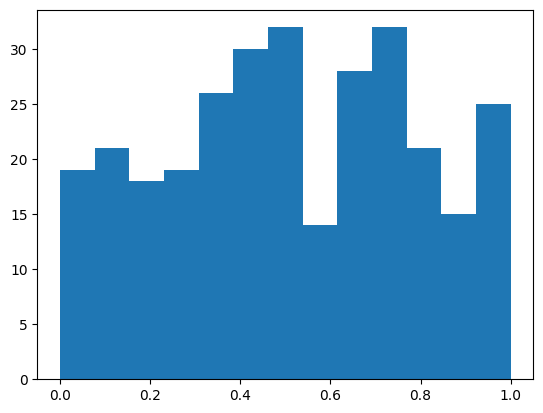

In [8]:
bins_number = int(2*X.shape[0]**(1/3))
# x_f, _, _ = plt.hist(X, bins=bins_number)
x_1 = (X + abs(min(X))) / (max(X) - min(X))
x_f, _, _ = plt.hist(x_1, bins=bins_number)
plt.show()

In [9]:
# x = np.linspace(-10, 10, 10000)
# Y = stats.uniform.pdf(x, min(X), max(X) - min(X)) * np.mean(x_f)
# plt.plot(x,Y)

In [10]:
bins_number = int(2*X.shape[0]**(1/3))
X_hist = np.histogram(X, bins=bins_number)
stats.kstest(x_1, 'uniform')

KstestResult(statistic=np.float64(0.05719738779120209), pvalue=np.float64(0.2697275576535686), statistic_location=np.float64(0.26386405445786876), statistic_sign=np.int8(-1))

In [11]:
stats.kstest(X, lambda x: stats.uniform.cdf(x, -abs(min(X)), max(X) - min(X)))

KstestResult(statistic=np.float64(0.05719738779120209), pvalue=np.float64(0.2697275576535686), statistic_location=np.float64(-2.313197094691737), statistic_sign=np.int8(-1))

## Визуальное представление выборки

<Axes: title={'center': 'Гистограмма с 20 NBins'}>

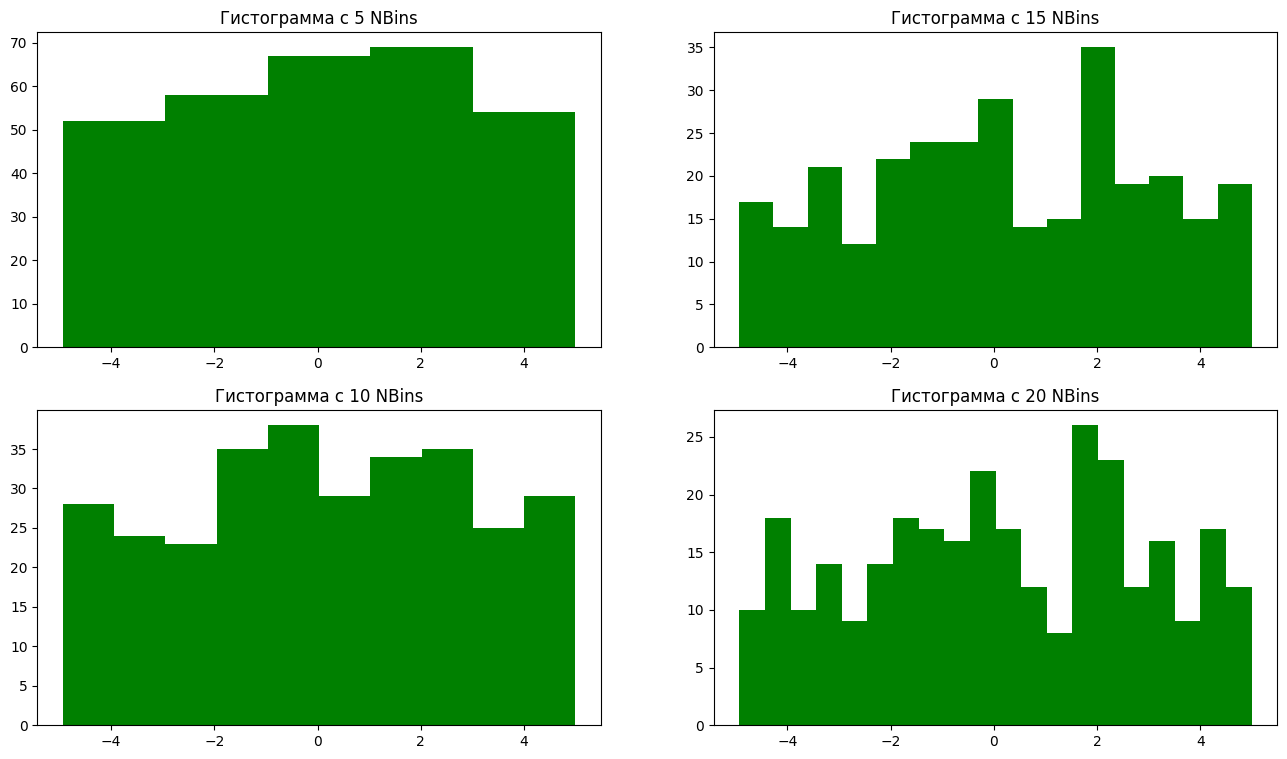

In [12]:
def plot_hist(array, ax, bins_num: int):
    ax.hist(array, bins = bins_num, color='green')
    ax.set_title(f'Гистограмма с {bins_num} NBins')
    return ax

fig, ax = plt.subplots(2, 2, figsize = (16, 9))
plot_hist(X, ax[0,0], 5)
plot_hist(X, ax[1,0], 10)
plot_hist(X, ax[0,1], 15)
plot_hist(X, ax[1,1], 20)

## Критерий хи-квадрат

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [13]:
m = np.mean(X)
d = np.var(X, ddof = 0)
bins_number = int(2*X.shape[0]**(1/3))

In [14]:
def chisquare_normal(dist, m, d, bins, ddof=1):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [15]:
chisquare_normal(X, m, d, 5)

(np.float64(157.33279353986083), np.float64(0.0))

In [16]:
chisquare_normal(X, m, d, 10)

(np.float64(166.46782989631404), np.float64(0.0))

In [17]:
chisquare_normal(X, m, d, 15)

(np.float64(200.85708510961317), np.float64(0.0))

In [18]:
chisquare_normal(X, m, d, 20)

(np.float64(210.00454680933044), np.float64(0.0))

### Статистическая гипотеза: $ H_0: X \sim R $

In [19]:
def chisquare_uniform(dist, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    uniform = (stats.uniform.cdf(bins1[1:], min(dist), max(dist) - min(dist)) - stats.uniform.cdf(bins1[:-1], min(dist), max(dist) - min(dist))) * dist.shape[0]
    Z = np.sum((counts - uniform) ** 2 / uniform)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [20]:
chisquare_uniform(X, 5)

(np.float64(3.9000000000000075), np.float64(0.14227407158651306))

In [21]:
chisquare_uniform(X, 10)

(np.float64(8.200000000000008), np.float64(0.3152890614332795))

In [22]:
chisquare_uniform(X, 15)

(np.float64(26.99999999999994), np.float64(0.007727195606984982))

In [23]:
chisquare_uniform(X, 20)

(np.float64(31.066666666666602), np.float64(0.019602556154794448))

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [56]:
def chisquare_chi2(X, bins, df=None):
    n = len(X)
    r = 0
    if not df:
        df = stats.chi2.fit(X)[0]
        r += 1
    frequences, bin_edges = np.histogram(X, bins=bins)
    k = len(frequences)
    p_list = stats.chi2.cdf(bin_edges[1:], df=df) - stats.chi2.cdf(
        bin_edges[:-1], df=df
    )
    z = sum((frequences - n * p_list) ** 2 / (n * p_list))
    p_value = stats.chi2.sf(z, df=k - r - 1)
    return z, p_value

In [57]:
chisquare_chi2(X, 5)

/var/folders/46/6my1fwkn3sg6fxgjn3l687yr0000gn/T/ipykernel_87728/350380114.py:12: RuntimeWarning: divide by zero encountered in divide
  z = sum((frequences - n * p_list) ** 2 / (n * p_list))


(np.float64(inf), np.float64(0.0))

In [58]:
chisquare_chi2(X, 10)

/var/folders/46/6my1fwkn3sg6fxgjn3l687yr0000gn/T/ipykernel_87728/350380114.py:12: RuntimeWarning: divide by zero encountered in divide
  z = sum((frequences - n * p_list) ** 2 / (n * p_list))


(np.float64(inf), np.float64(0.0))

$\infty$

In [28]:
chisquare_chi2(X, 15)

/var/folders/46/6my1fwkn3sg6fxgjn3l687yr0000gn/T/ipykernel_87728/2144564589.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(np.float64(inf), np.float64(0.0))

In [29]:
chisquare_chi2(X, 20)

/var/folders/46/6my1fwkn3sg6fxgjn3l687yr0000gn/T/ipykernel_87728/2144564589.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(np.float64(inf), np.float64(0.0))

## Критерий Колмогорова

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [30]:
stats.kstest(x_1, 'norm')

KstestResult(statistic=np.float64(0.5), pvalue=np.float64(7.063417378483843e-70), statistic_location=np.float64(0.0), statistic_sign=np.int8(-1))

### Статистическая гипотеза: $ H_0: X \sim R $

In [31]:
stats.kstest(x_1, 'uniform')

KstestResult(statistic=np.float64(0.05719738779120209), pvalue=np.float64(0.2697275576535686), statistic_location=np.float64(0.26386405445786876), statistic_sign=np.int8(-1))

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [32]:
stats.kstest(X, lambda x: stats.chi2.cdf(x, 5))

KstestResult(statistic=np.float64(0.5627599633619769), pvalue=np.float64(3.8789732913711274e-90), statistic_location=np.float64(2.1634794483615662), statistic_sign=np.int8(1))

In [33]:
stats.chi2.stats(5)

(np.float64(5.0), np.float64(10.0))

## Двухвыборочные критерии 

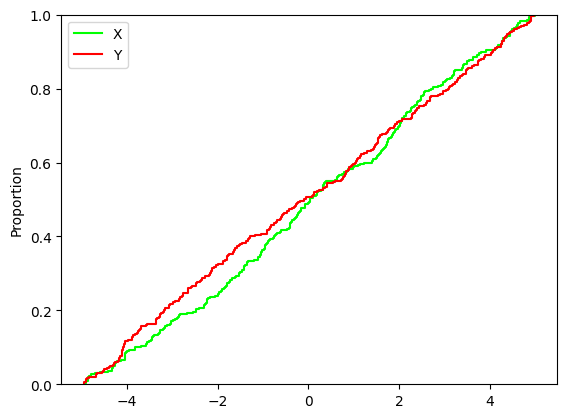

In [35]:
import seaborn as sns

sns.ecdfplot(x = X, color='lime')
sns.ecdfplot(x = Y, color='red')
plt.xlabel = 'values'
plt.legend(labels=['X', 'Y'])
plt.show()

<Axes: ylabel='Count'>

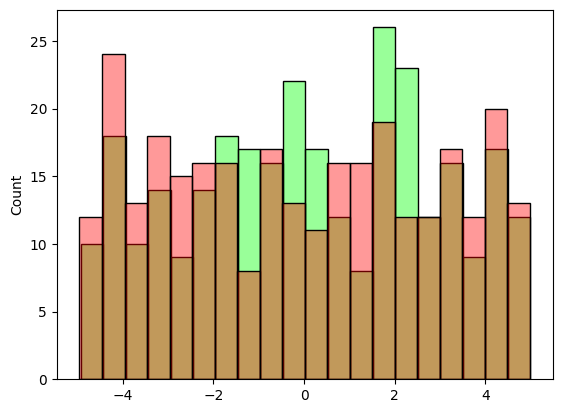

In [36]:
sns.histplot(X, bins = 20, color='lime', alpha =0.4)
sns.histplot(Y, bins = 20, color = 'red', alpha = 0.4)

<Axes: ylabel='Proportion'>

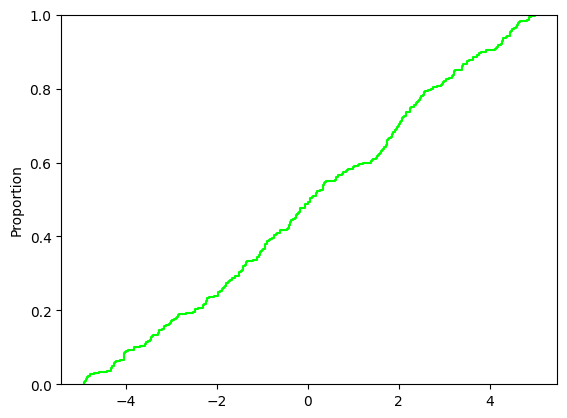

In [37]:
sns.ecdfplot(x = X, color='lime')

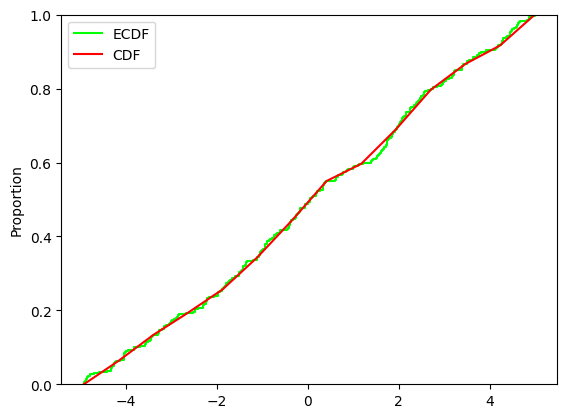

In [38]:
sns.ecdfplot(x = X, color='lime', label="ECDF")
count, bins_count = np.histogram(X, bins=bins_number)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
cdf1 = np.insert(cdf, 0, 0)
bins_count1 = np.insert(bins_count, 0, -5)
plt.plot(bins_count1[1:], cdf1, color='red',label="CDF")
plt.legend()

In [39]:
def two_sample_chisquare(dist1, dist2, bins=15):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)
    

Peasrson $ {\chi}^2 $ test

In [40]:
two_sample_chisquare(X, Y, bins_number)

(np.float64(-0.0008474661813318695), np.float64(1.0))

Kolmogorov-Smirnov test

In [41]:
stats.ks_2samp(X, Y)

KstestResult(statistic=np.float64(0.08666666666666667), pvalue=np.float64(0.21005749381264038), statistic_location=np.float64(-1.990927008719502), statistic_sign=np.int8(-1))

Sign-test


In [42]:
sign_test(X, Y)

(np.float64(4.0), np.float64(0.6861754232113882))

U-test

In [43]:
stats.ranksums(X, Y)

RanksumsResult(statistic=np.float64(0.8694884733068824), pvalue=np.float64(0.3845800100471043))

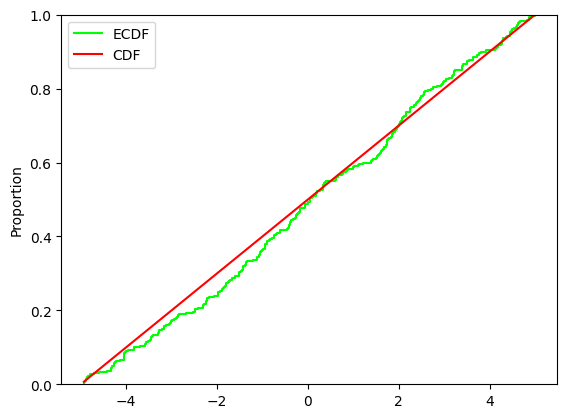

In [44]:
# sns.ecdfplot(x = X, color='lime', label="ECDF")
x = np.arange(min(X), max(X), 0.001)

sns.ecdfplot(x = X, color='lime',label="ECDF")
plt.plot(x, stats.uniform.cdf(x, -5, 10), color='red', label="CDF")

plt.legend()